Problématique: Prévoir proba de suvrvivre d'une personne en fonction des éléments tel que Sexe,Age,Class, Relation Familiale avec les autres passagers

# Exploration de données 

In [1]:
import sklearn
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, binarize
from sklearn.linear_model import LogisticRegression
import re
import numpy as np
from numpy import argmax
from matplotlib import pyplot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score , roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score
from sklearn import tree
from sklearn import svm
#import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform

pd.options.display.max_columns = None
sns.set(rc={'figure.figsize':(10,5)})

Concat Train + Test

In [107]:
trainB = pd.read_csv('train.csv',sep=',',encoding='latin1')
testB = pd.read_csv('test.csv',sep=',',encoding='latin1')
Survived = trainB['Survived']
dt = pd.concat(objs=[trainB, testB], axis=0,sort = False)
dt.shape

(1309, 12)

In [3]:
testB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Rename columns

In [4]:
dt=dt.rename(columns={"Pclass": "Classe", "Name": "Nom_Prénom","SibSp": "FrereS/MariF","Parch": "ParentEnfant",'Embarked':'Port',"Fare":"Tarif","Cabin":"Cabine"})

Tableau de corrélation: Valeurs Numériques

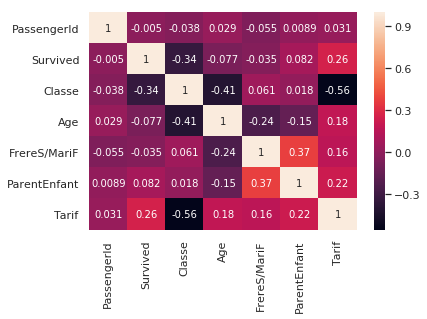

In [5]:
corr = dt.corr()
sns.heatmap(corr,annot = True)
plt.show()

MAKE COPY DATA SET + DELETE LES COLONNES QUI NE SONT PAS IMPORTANTES:
PassengerId
Ticket
Cabin
Embarked
Fare: qui est bien corrélée avec Class

Make copy

In [6]:
dt_copy = dt.copy()

In [7]:
dt_copy.head()

,PassengerId,Survived,Classe,Nom_Prénom,Sex,Age,FrereS/MariF,ParentEnfant,Ticket,Tarif,Cabine,Port
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


    Check Missing/Outliers Values

In [8]:
dt_copy['Classe'].unique()

array([3, 1, 2])

In [9]:
dt_copy['Sex'].unique()

array(['male', 'female'], dtype=object)

In [10]:
dt_copy['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  , 22.5 ,
       18.5 , 67.  , 76.  , 26.5 , 60.5 , 11.5 ,  0.33,  0.17, 38.5 ])

In [11]:
dt_copy['FrereS/MariF'].unique()

array([1, 0, 3, 4, 2, 5, 8])

In [12]:
dt_copy['ParentEnfant'].unique()

array([0, 1, 2, 5, 3, 4, 6, 9])

## Missing + Outliers Values

In [13]:
Null_Value = dt_copy.isnull().sum().sort_values(ascending=False)
NV_Percent = (dt_copy.isnull().sum()/dt_copy.isnull().count()).sort_values(ascending=False)
NV_Percent = round(NV_Percent*100,2)
Missing_data = pd.concat([Null_Value, NV_Percent], axis=1, keys=['Total', 'Percent'])
Missing_data[:5]

,Total,Percent
Cabine,1014,77.46
Survived,418,31.93
Age,263,20.09
Port,2,0.15
Tarif,1,0.08


In [14]:
dt_copy['Age'].fillna(dt_copy['Age'].mean(),inplace=True)

In [15]:
dt_copy['Sex'].fillna(method='bfill',inplace=True)
dt_copy['FrereS/MariF'].fillna(method='bfill',inplace=True)
dt_copy['Classe'].fillna(method='bfill',inplace=True)
dt_copy['ParentEnfant'].fillna(method='bfill',inplace=True)


In [16]:
dt['Tarif'].fillna(dt['Tarif'].mean(),inplace=True)
dt = dt.fillna({"Port": "S"})

In [17]:
dt_copy.isnull().sum().sort_values(ascending=False).head()

Cabine      1014
Survived     418
Port           2
Tarif          1
Ticket         0
dtype: int64

### VISUALISATION DE DONNÉES

### Entre Homme et Femme

Text(0, 0.5, 'Nombre de survivant')

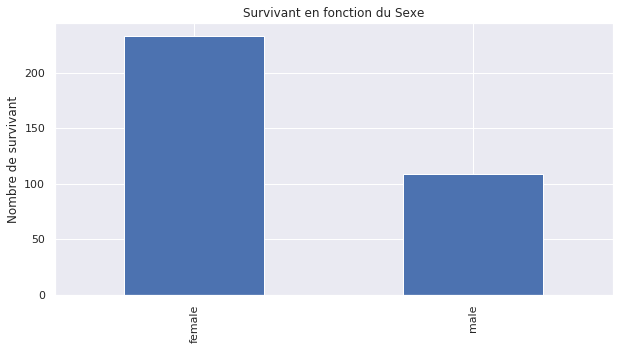

In [18]:
Survécu = trainB[trainB['Survived'] == 1.0]
fig, ax = plt.subplots(figsize=(10,5))
Survécu['Sex'].value_counts().plot(kind = 'bar')
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
ax.set_title('Survivant en fonction du Sexe')
ax.set_ylabel('Nombre de survivant')

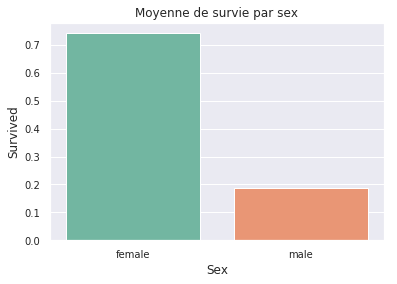

In [19]:
sns.barplot(x="Sex", y='Survived', data=trainB.groupby('Sex').mean()['Survived'].reset_index(), palette="Set2").set_title('Moyenne de survie par sex')
plt.savefig("Moyenne de survie par sex.png")

### En fonction de l'âge

Text(0.5, 1.0, "Survivants en fonction de l'âge")

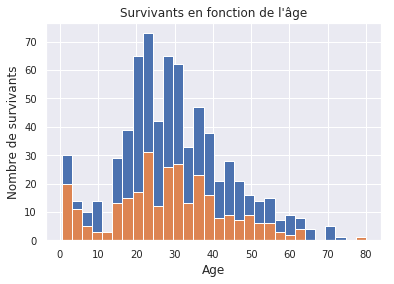

In [20]:
trainB['Age'].hist(bins=30)
Survécu['Age'].hist(bins=30)
plt.ylabel('Nombre de survivants')
plt.xlabel('Age')
plt.savefig("survie par age.png")
plt.title("Survivants en fonction de l'âge")


ENTRE LES CLASSES

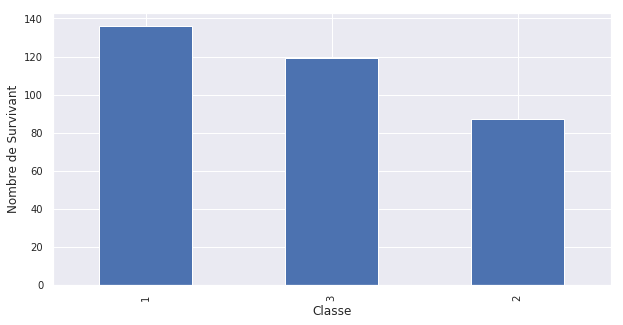

In [21]:
fig, ax = plt.subplots(figsize=(10,5))
Survécu['Pclass'].value_counts().plot(kind = 'bar')
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
plt.ylabel('Nombre de Survivant')
plt.xlabel('Classe')
fig.savefig('classes.png')

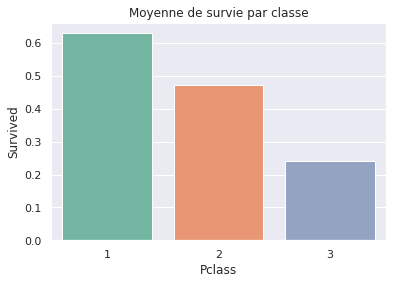

In [22]:
sns.set(style="darkgrid")
sns.barplot(x="Pclass", y='Survived', data=trainB.groupby('Pclass').mean()['Survived'].reset_index(), palette="Set2").set_title('Moyenne de survie par classe')
plt.savefig("Moyenne de survie par classe.png")

### Relation Parent_Enfant

Text(0.5, 0, 'Relation Parent Enfant')

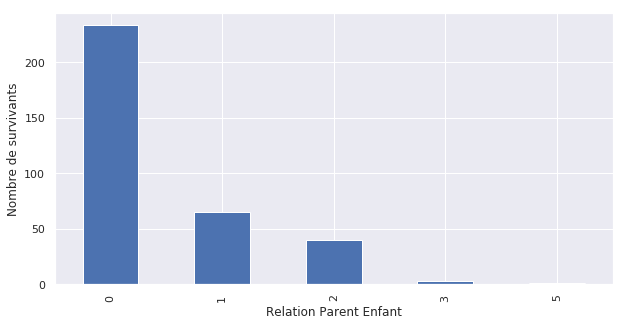

In [23]:
fig, ax = plt.subplots(figsize=(10,5))
Survécu['Parch'].value_counts().plot(kind = 'bar')
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
plt.ylabel('Nombre de survivants')
plt.xlabel('Relation Parent Enfant')

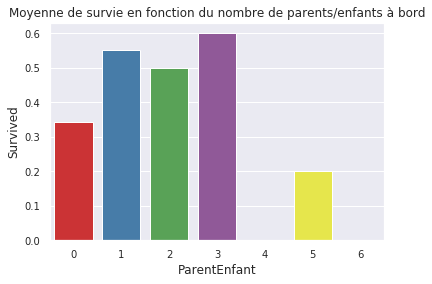

In [24]:
sns.barplot(x="ParentEnfant", y='Survived', data=dt[:891].groupby('ParentEnfant').mean()['Survived'].reset_index(), palette="Set1").set_title("Moyenne de survie en fonction du nombre de parents/enfants à bord")
plt.savefig("Moyenne de survie parent_enfants.png")
plt.show()

### Relation FrereSoeur/MariFemme

Text(0.5, 0, 'Relation Frere_Soeur/Mari_Femme')

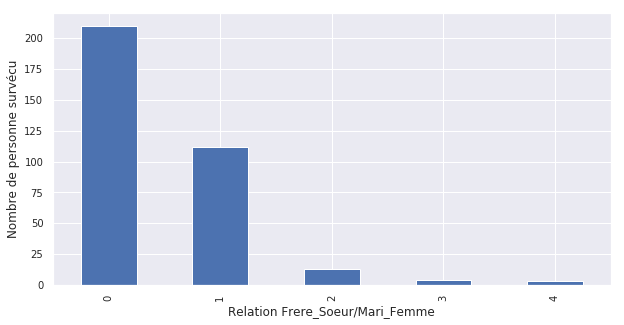

In [25]:
fig, ax = plt.subplots(figsize=(10,5))
Survécu['SibSp'].value_counts().plot(kind = 'bar')
plt.rc('xtick', labelsize=10)     
plt.rc('ytick', labelsize=10)
plt.ylabel('Nombre de personne survécu')
plt.xlabel('Relation Frere_Soeur/Mari_Femme')

In [116]:
sns.barplot(x="FrereS/MariF", y='Survived', data=dt[:891].groupby('FrereS/MariF').mean()['Survived'].reset_index(), palette="Set1").set_title('Moyenne de survie en fonction du nombre de Frere_Soeur/Mari_Femme à bord')
sns.ylabel('Nombre de personne survécu')
sns.xlabel('Relation Frere_Soeur/Mari_Femme')
plt.savefig("Moyenne de survie FrereS_MariF.png")

KeyError: 'FrereS/MariF'

### Par port d'embarquement

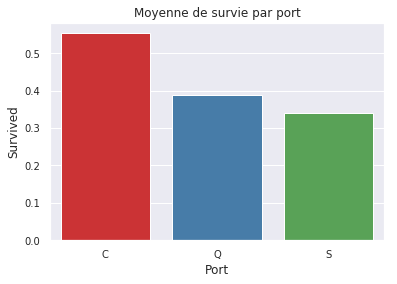

In [27]:

sns.barplot(x="Port", y='Survived', data=dt[:891].groupby('Port').mean()['Survived'].reset_index(), palette="Set1").set_title('Moyenne de survie par port')
plt.savefig("Moyenne de survie par port.png")

## Proba de Survivant pour les Hommes en fonction de classe

In [100]:
dt_copy.head()

,PassengerId,Survived,Classe,Nom_Prénom,Sex,Age,FrereS/MariF,ParentEnfant,Ticket,Tarif,Cabine,Port
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


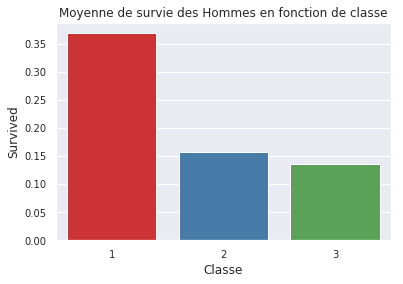

In [114]:
Homme_aBord = dt_copy[dt_copy['Sex']== 'male']
Homme_aBord.head()
sns.barplot(x="Classe", y='Survived', data=Homme_surBord[:891].groupby('Classe').mean()['Survived'].reset_index(), palette="Set1").set_title('Moyenne de survie des Hommes en fonction de classe')
plt.savefig("Moyenne de survie Classe_Homme.png")

## Proba de Survivant pour les Hommes en fonction de classe

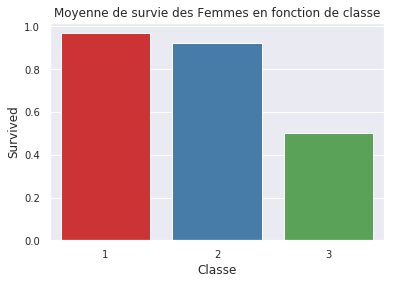

In [113]:
Femme_aBord = dt_copy[dt_copy['Sex']== 'female']
Femme_aBord.head()
sns.barplot(x="Classe", y='Survived', data=Femme_aBord[:891].groupby('Classe').mean()['Survived'].reset_index(), palette="Set1").set_title('Moyenne de survie des Femmes en fonction de classe')
plt.savefig("Moyenne de survie Classe_Femme.png")

## 1. MODEL WITH 3 VARIABLES: SEX, AGE, CLASSE

### Try to fill Age by Regression Linéaire WITH variables Class,ParentEnfant, MariFemme

In [29]:
Label = trainB['Survived']
logisticRegr = LogisticRegression()

In [30]:
dt_RL = dt[['PassengerId','Nom_Prénom','Classe','FrereS/MariF','ParentEnfant','Age','Sex','Tarif', 'Port']]
trainTest = dt_RL[pd.isna(dt_RL['Age'])]
trainTrain = dt_RL[pd.notnull(dt_RL['Age'])]
trainTest.head()

,PassengerId,Nom_Prénom,Classe,FrereS/MariF,ParentEnfant,Age,Sex,Tarif,Port
5,6,"Moran, Mr. James",3,0,0,NaN,male,8.4583,Q
17,18,"Williams, Mr. Charles Eugene",2,0,0,NaN,male,13.0000,S
19,20,"Masselmani, Mrs. Fatima",3,0,0,NaN,female,7.2250,C
26,27,"Emir, Mr. Farred Chehab",3,0,0,NaN,male,7.2250,C
28,29,"O'Dwyer, Miss. Ellen ""Nellie""",3,0,0,NaN,female,7.8792,Q


In [31]:
y_train = trainTrain['Age']
y_test = trainTest['Age']
X_train = trainTrain[['Classe','FrereS/MariF','ParentEnfant','Tarif']]
X_test = trainTest[['Classe','FrereS/MariF','ParentEnfant','Tarif']]

Train Model with Regression Linear

In [32]:
reg = LinearRegression()
reg.fit(X_train, y_train)
trainTest['Age'] = (reg.predict(X_test))
mask = trainTest['Age']<0
trainTest['Age'][mask] = 0.5

/usr/lib/python3/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/hang/.local/lib/python3.6/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new

### LabelEncoding 

In [33]:
#Lier les "new" Ages avec passenger ID 
dt_RL = dt_RL.set_index("PassengerId").combine_first(trainTest.set_index("PassengerId")).reset_index()
dt_RL.head()


,PassengerId,Nom_Prénom,Classe,FrereS/MariF,ParentEnfant,Age,Sex,Tarif,Port
0,1,"Braund, Mr. Owen Harris",3,1,0,22.0,male,7.2500,S
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,38.0,female,71.2833,C
2,3,"Heikkinen, Miss. Laina",3,0,0,26.0,female,7.9250,S
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,35.0,female,53.1000,S
4,5,"Allen, Mr. William Henry",3,0,0,35.0,male,8.0500,S


In [34]:
##Age
age_band= pd.cut(dt_RL['Age'], 5)  
age_band.value_counts()


(16.136, 32.102]    718
(32.102, 48.068]    324
(0.0902, 16.136]    148
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: Age, dtype: int64

In [35]:
    dt_RL.loc[dt_RL['Age'] <= 16.136, 'Age'] = 0
    dt_RL.loc[(dt_RL['Age'] > 16.136) & (dt_RL['Age'] <= 32.102), 'Age'] = 1
    dt_RL.loc[(dt_RL['Age'] > 32.102) & (dt_RL['Age'] <= 48.068), 'Age'] = 2
    dt_RL.loc[(dt_RL['Age'] > 48.068) & (dt_RL['Age'] <= 64.034), 'Age'] = 3
    dt_RL.loc[ dt_RL['Age'] > 64.034, 'Age'] = 4
    dt_RL['Age'] = dt_RL['Age'].astype(int)

In [36]:
##Tarif

fare_band= pd.qcut(dt_RL['Tarif'],5)
fare_band.value_counts()

(-0.001, 7.854]      275
(21.679, 41.579]     263
(41.579, 512.329]    259
(10.5, 21.679]       258
(7.854, 10.5]        254
Name: Tarif, dtype: int64

In [37]:
    dt_RL.loc[dt_RL['Tarif'] <= 7.85, 'Tarif'] = 0
    dt_RL.loc[(dt_RL['Tarif'] > 7.85) & (dt_RL['Tarif'] <= 10.5), 'Tarif'] = 1
    dt_RL.loc[(dt_RL['Tarif'] > 10.5) & (dt_RL['Tarif'] <= 21.679), 'Tarif']   = 2
    dt_RL.loc[(dt_RL['Tarif'] >21.679) & (dt_RL['Tarif'] <= 39.688), 'Tarif'] = 3
    dt_RL.loc[ dt_RL['Tarif'] >= 39.688, 'Tarif'] = 4
    dt_RL['Tarif'] = dt_RL['Tarif'].astype(int)

In [38]:
##Sexe

sex_map = {"male": 0, "female": 1}
dt_RL['Sex'] = dt_RL['Sex'].map(sex_map)

In [39]:
##Port

port_map = {"S": 1, "C": 2, "Q": 3}
dt_RL['Port'] = dt_RL['Port'].map(port_map)

### Test model with Regression Logistic

In [40]:
dt_RL.head()

,PassengerId,Nom_Prénom,Classe,FrereS/MariF,ParentEnfant,Age,Sex,Tarif,Port
0,1,"Braund, Mr. Owen Harris",3,1,0,1,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,2,1,4,2
2,3,"Heikkinen, Miss. Laina",3,0,0,1,1,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,2,1,4,1
4,5,"Allen, Mr. William Henry",3,0,0,2,0,1,1


In [41]:
train_RL = dt_RL.iloc[:891]
test_RL = dt_RL.iloc[891:]

In [42]:
dt_VarRL = train_RL[['Classe','Age','Sex','Tarif']]
#dt_VarRL = pd.get_dummies(dt_VarRL)
dt_VarRL.columns

Index(['Classe', 'Age', 'Sex', 'Tarif'], dtype='object')

In [43]:
#Split data
X_train_RL,X_test_RL,y_train_RL,y_test_RL = train_test_split(dt_VarRL, Label, random_state = 42)
X_train_RL.head()

,Classe,Age,Sex,Tarif
298,1,2,0,3
884,3,1,0,0
247,2,1,1,2
478,3,1,0,0
305,1,0,0,4


In [44]:
##Model
modelRL = logisticRegr.fit(X_train_RL,y_train_RL)
predictRL = logisticRegr.predict(X_test_RL)

/home/hang/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [45]:
print(sklearn.metrics.classification_report(y_test_RL, predictRL))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       134
           1       0.74      0.71      0.72        89

   micro avg       0.78      0.78      0.78       223
   macro avg       0.78      0.77      0.77       223
weighted avg       0.78      0.78      0.78       223



## 2. Model with Sex, Age, Classe, FrereSoeur_MariFemme, ParentEnfant, Tarif

In [46]:
dt_5col = dt_RL[['Classe','Sex','Age','FrereS/MariF','ParentEnfant','Tarif']]

In [47]:
#dt_5col = pd.get_dummies(dt_5col)
dt_5col.columns

Index(['Classe', 'Sex', 'Age', 'FrereS/MariF', 'ParentEnfant', 'Tarif'], dtype='object')

In [48]:
train_5col = dt_5col.iloc[:891]
test_5col = dt_5col.iloc[891:]
X_train_5col,X_test_5col,y_train_5col,y_test_5col = train_test_split(train_5col, Label, random_state = 42)
X_train_5col.head()

,Classe,Sex,Age,FrereS/MariF,ParentEnfant,Tarif
298,1,0,2,0,0,3
884,3,0,1,0,0,0
247,2,1,1,0,2,2
478,3,0,1,0,0,0
305,1,0,0,1,2,4


In [49]:
model_5col = logisticRegr.fit(X_train_5col, y_train_5col)
predict_5col = logisticRegr.predict(X_test_5col)

/home/hang/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [50]:
print(sklearn.metrics.classification_report(y_test_5col, predict_5col))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       134
           1       0.76      0.73      0.75        89

   micro avg       0.80      0.80      0.80       223
   macro avg       0.80      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



AUC: 0.874


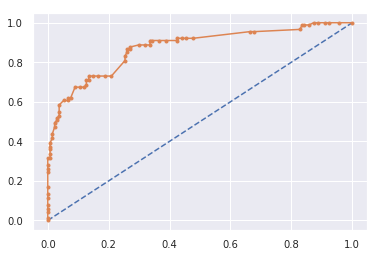

In [51]:
##Courbe ROC
probs2= logisticRegr.predict_proba(X_test_5col)[::,1]
# calculate AUC
auc = roc_auc_score(y_test_5col, probs2)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test_5col, probs2)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [52]:
probs5col = logisticRegr.predict_proba(X_test_5col)
y_pred_5 = binarize(probs5col, threshold=0.82)
print(sklearn.metrics.confusion_matrix(y_test_5col, y_pred_5[:,1]))

[[133   1]
 [ 57  32]]


## 3. MODEL WITH 6 col:  Sex, Classe, Age, ParentEnfant, FrereSoeur_MariFemme, Tarif et Titre (qui est extrait from Name)

In [53]:
dt_RL.head()

,PassengerId,Nom_Prénom,Classe,FrereS/MariF,ParentEnfant,Age,Sex,Tarif,Port
0,1,"Braund, Mr. Owen Harris",3,1,0,1,0,0,1
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,2,1,4,2
2,3,"Heikkinen, Miss. Laina",3,0,0,1,1,1,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,2,1,4,1
4,5,"Allen, Mr. William Henry",3,0,0,2,0,1,1


In [54]:
def Titre(name):
    titre = ''.join(re.findall('(?:,\s)(\w+)',name))
    return titre
dt_RL['Titre'] = dt_RL['Nom_Prénom'].apply(Titre)   

In [55]:
dt_RL.head()
dt_RL['Titre'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the', 'Jonkheer',
       'Dona'], dtype=object)

In [56]:
#Remplace certains titres par des plus communs

dt_RL['Titre'] = dt_RL['Titre'].replace(['Capt', 'Col', 'the',
'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Autre')
    
dt_RL['Titre'] = dt_RL['Titre'].replace('Sir', 'Mr')
dt_RL['Titre'] = dt_RL['Titre'].replace('Mlle', 'Miss')
dt_RL['Titre'] = dt_RL['Titre'].replace('Ms', 'Miss')
dt_RL['Titre'] = dt_RL['Titre'].replace(['Countess', 'Lady', 'Mme'], 'Mrs')

In [57]:
#Combine col Survived avec train-TS
dt_titre_survived = pd.concat([dt_RL['Titre'].iloc[:891], trainB.Survived], axis=1, sort=False)


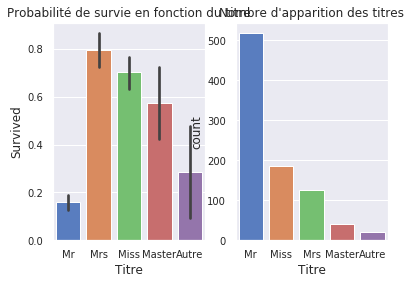

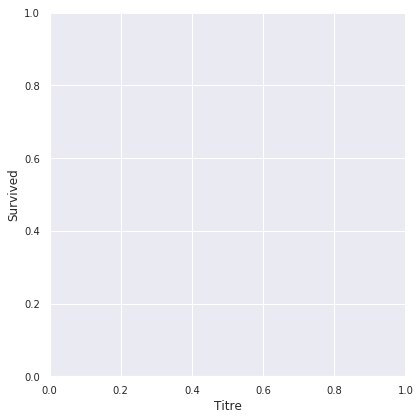

In [58]:

fig, axes = plt.subplots(1,2)

sns.catplot(ax= axes[0], x="Titre", y="Survived", data=dt_titre_survived,
                height=6, kind="bar", palette="muted")
axes[0].set_title('Probabilité de survie en fonction du titre')

sns.countplot(ax= axes[1], x="Titre", data=dt_titre_survived, order = dt_titre_survived.Titre.value_counts().index,
                palette="muted")
axes[1].set_title("Nombre d'apparition des titres")

fig.savefig("survie_titre")
plt.show()

In [59]:
#Titre en valeurs numériques

titre_map = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Autre": 5}

dt_RL['Titre'] = dt_RL['Titre'].map(titre_map)
dt_RL['Titre'] = dt_RL['Titre'].fillna(0)

In [60]:
dt_RL['Titre'].unique()

array([1, 3, 2, 4, 5])

for i in range(len(dt_RL['Titre'])):
    if (dt_RL['Titre'][i] != 'Mr' and dt_RL['Titre'][i]!= 'Mrs' and dt_RL['Titre'][i]!='Miss' and dt_RL['Titre'][i]!='Master' 
        and dt_RL['Titre'][i]!='Dr' and dt_RL['Titre'][i]!='Mme' and dt_RL['Titre'][i]!='Ms' and dt_RL['Titre'][i]!='Major'
           and dt_RL['Titre'][i]!='Lady' and dt_RL['Titre'][i]!='Sir' and dt_RL['Titre'][i]!='Mlle'):
        dt_RL['Titre'][i] ='Autres'

### Training model

In [61]:
dt_RL.drop(["PassengerId","Nom_Prénom"],axis=1).head()

,Classe,FrereS/MariF,ParentEnfant,Age,Sex,Tarif,Port,Titre
0,3,1,0,1,0,0,1,1
1,1,1,0,2,1,4,2,3
2,3,0,0,1,1,1,1,2
3,1,1,0,2,1,4,1,3
4,3,0,0,2,0,1,1,1


In [62]:
dt_TS = dt_RL[['Classe','FrereS/MariF','ParentEnfant','Age','Titre','Sex','Tarif']]
#dt_TS = pd.get_dummies(dt_TS)
dt_TS.columns
train_TS = dt_TS.iloc[:891]
test_TS = dt_TS.iloc[891:]

In [63]:
test_TS.head()
test_TS.shape

(418, 7)

In [64]:
#Split data
X_train_TS,X_test_TS,y_train_TS,y_test_TS = train_test_split(train_TS,Label, random_state = 42)
X_train_TS.head()

,Classe,FrereS/MariF,ParentEnfant,Age,Titre,Sex,Tarif
298,1,0,0,2,1,0,3
884,3,0,0,1,1,0,0
247,2,0,2,1,3,1,2
478,3,0,0,1,1,0,0
305,1,1,2,0,4,0,4


In [65]:
##Model
modelTS = logisticRegr.fit(X_train_TS,y_train_TS)
predictTS = logisticRegr.predict(X_test_TS)
#Score
print(sklearn.metrics.classification_report(y_test_TS, predictTS))

              precision    recall  f1-score   support

           0       0.83      0.84      0.84       134
           1       0.76      0.74      0.75        89

   micro avg       0.80      0.80      0.80       223
   macro avg       0.79      0.79      0.79       223
weighted avg       0.80      0.80      0.80       223



/home/hang/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## 4. MODEL WITH 8 col: Sex, Classe, Age, ParentEnfant, FrereSoeur_MariFemme, Tarif, Titre et Port

In [66]:
dt_TS = dt_RL[['Classe','FrereS/MariF','ParentEnfant','Age','Titre','Sex','Tarif', 'Port']]
#dt_TS = pd.get_dummies(dt_TS)
dt_TS.columns
train_TS = dt_TS.iloc[:891]
test_TS = dt_TS.iloc[891:]

In [67]:
#Split data
X_train_TS,X_test_TS,y_train_TS,y_test_TS = train_test_split(train_TS,Label, random_state = 42)
X_train_TS.head()

,Classe,FrereS/MariF,ParentEnfant,Age,Titre,Sex,Tarif,Port
298,1,0,0,2,1,0,3,1
884,3,0,0,1,1,0,0,1
247,2,0,2,1,3,1,2,1
478,3,0,0,1,1,0,0,1
305,1,1,2,0,4,0,4,1


In [68]:
##Model
modelTS = logisticRegr.fit(X_train_TS,y_train_TS)
predictTS = logisticRegr.predict(X_test_TS)
#Score
print(sklearn.metrics.classification_report(y_test_TS, predictTS))
acc_logreg = accuracy_score(y_test_TS,predictTS)
acc_logreg

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       134
           1       0.74      0.73      0.73        89

   micro avg       0.79      0.79      0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223



/home/hang/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7892376681614349

## ARBRE DE DECISION

#### 6 COLONNES DONT LE TITRE

In [69]:
Tree_TS = DecisionTreeClassifier(random_state =42)
Tree_TS.fit(X_train_TS, y_train_TS)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [70]:
predictTree_TS = Tree_TS.predict(X_test_TS)
acc_decisiontree = accuracy_score(y_test_TS,predictTree_TS)
acc_decisiontree

0.820627802690583

## SVM

In [71]:
SVM = svm.SVC(kernel='rbf',C=1 ,gamma=0.5)
SVM.fit(X_train_TS,y_train_TS)
SVM.predict(X_test_TS)
acc_svc = accuracy_score(y_test_TS,SVM.predict(X_test_TS))
acc_svc

0.8295964125560538

In [72]:
## Test sur Test
predict_SVM = SVM.predict(test_TS)

## KNN

In [73]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
model_knn = knn.fit(X_train_TS,y_train_TS)
y_pred = model_knn.predict(X_test_TS)
acc_knn = round(accuracy_score(y_test_TS, y_pred), 2)
acc_knn

0.83

## ENSEMBLING MODEL (Random Forest)

In [74]:
RandomForest = RandomForestClassifier(random_state=42)
model_rforest = RandomForest.fit(X_train_TS, y_train_TS)
PredictRF = model_rforest.predict(X_test_TS)
acc_randomforest = accuracy_score(y_test_TS,PredictRF)
acc_randomforest

/home/hang/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.7802690582959642

## RANDOM SEARCH

In [75]:
# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter distribution using uniform distribution
C = uniform(loc=0, scale=1)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create randomized search 5-fold cross validation and 100 iterations
clf = RandomizedSearchCV(LogisticRegression(), hyperparameters, random_state=42, n_iter=100, cv=5, verbose=0, n_jobs=-1)

# Fit randomized search
best_model = clf.fit(X_train_TS, y_train_TS)

/home/hang/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [76]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

# Predict target vector
y_predictRS = best_model.predict(X_test_TS)
acc_RandSearch_LogReg = accuracy_score(y_test_TS, y_predictRS)
acc_RandSearch_LogReg

Best Penalty: l2
Best C: 0.230893825622149


0.7892376681614349

In [77]:
####RandomSearch sur SVM

# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
#C est le paramètre de pénalité ("Penalty Parameter ") qui sert à fixer le compromis 
#entre la minimisation de l'erreur d'apprentissage et la maximisation de la marge. 
#Gamma intervient dans la fonction kernel. 

rand_list = {"C": uniform(0, 10),
             "gamma": uniform(0.1, 1)}
              
rand_search_svm = RandomizedSearchCV(svm.SVC(), param_distributions = rand_list, n_iter = 100, n_jobs = 4, cv = 3, random_state = 42) 
rs_SVM = rand_search_svm.fit(X_train_TS, y_train_TS) 
#rand_search_svm.cv_results_

In [78]:
print(uniform(2, 10))

In [79]:
y_predict_rs_SVM = rs_SVM.predict(X_test_TS)

acc_RandSearch_SVM = accuracy_score(y_test_TS, y_predict_rs_SVM)
acc_RandSearch_SVM

0.8295964125560538

### BILAN DES MODELES

In [80]:


models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Decision Tree', 'Random Search Log Reg'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_randomforest, 
              acc_decisiontree, acc_RandSearch_LogReg]})
models.sort_values(by='Score', ascending=False)



,Model,Score
1,KNN,0.830000
0,Support Vector Machines,0.829596
4,Decision Tree,0.820628
2,Logistic Regression,0.789238
5,Random Search Log Reg,0.789238
3,Random Forest,0.780269


### SOUMISSION SUR KAGGLE

In [81]:
predicted = logisticRegr.predict(test_TS)
submission_Titanic = pd.read_csv('gender_submission.csv')


In [82]:
submission_Titanic.Survived = predicted
submission_Titanic.to_csv('submissionSVM.csv', index=False)

In [83]:
submission_Titanic.Survived = predict_SVM
submission_Titanic.to_csv('submissionSVM.csv', index=False)

In [84]:

RandomForestClassifier()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [85]:
submission_Titanic.Survived = best_model.predict(test_TS)
submission_Titanic.to_csv('submissionRS.csv', index=False)

In [86]:
##Submit KNN

survive_predictions_file_test_KNN = knn.predict(test_TS)

submission_KNN = pd.DataFrame({'PassengerId':testB['PassengerId'],'Survived':survive_predictions_file_test_KNN})
filename = 'Titanic Submission KNN.csv'

submission_KNN.to_csv(filename,index=False)

In [87]:
submission_KNN.shape

(418, 2)

In [88]:
##Submit SVM

survive_predictions_file_test_SVM = SVM.predict(test_TS)

submission_SVM = pd.DataFrame({'PassengerId':testB['PassengerId'],'Survived':survive_predictions_file_test_SVM})
filename = 'Titanic Submission SVM.csv'

submission_SVM.to_csv(filename,index=False)
